# Loading Data

In [3]:
pip install boto3

  Using cached boto3-1.34.88-py3-none-any.whl.metadata (6.6 kB)
  Using cached botocore-1.34.88-py3-none-any.whl.metadata (5.7 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.10.1-py3-none-any.whl.metadata (1.7 kB)
Using cached boto3-1.34.88-py3-none-any.whl (139 kB)
Using cached botocore-1.34.88-py3-none-any.whl (12.2 MB)
Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
Using cached s3transfer-0.10.1-py3-none-any.whl (82 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
from io import BytesIO
import random

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

In [5]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]

In [6]:
# read in data

total_rows = sum(1 for _ in open('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv')) - 1
sample_size = 100000
skip_indices = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))

reader = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',
    usecols=use_cols,
    skiprows=skip_indices,
    chunksize=1000
)
jan = pd.concat([chunk for chunk in reader])

In [7]:
jan.head()

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,1,4,5,OO,N916SW,5659,ISN,DEN,1335,...,0,118.0,110.0,80.0,576,NaN,NaN,NaN,NaN,NaN
1,2019,1,4,5,OO,N114SY,5661,SEA,SFO,1610,...,0,136.0,134.0,110.0,679,NaN,NaN,NaN,NaN,NaN
2,2019,1,4,5,OO,N145SY,5668,DEN,DFW,803,...,0,124.0,129.0,95.0,641,NaN,NaN,NaN,NaN,NaN
3,2019,1,4,5,OO,N679SA,5672,MLI,DEN,1651,...,0,149.0,143.0,126.0,752,NaN,NaN,NaN,NaN,NaN
4,2019,1,4,5,OO,N787SK,5674,SFO,ASE,1050,...,0,151.0,122.0,102.0,848,NaN,NaN,NaN,NaN,NaN


In [8]:
cols = jan.columns
cols

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline',
       'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 'Dest',
       'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut', 'TaxiIn', 'CRSArrTime',
       'ArrTime', 'ArrDelay', 'Cancelled', 'CancellationCode', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

# EDA

## Data set 1

In [9]:
jan['DepDelay'].describe()

count    97286.000000
mean         9.665399
std         48.432853
min        -38.000000
25%         -6.000000
50%         -3.000000
75%          5.000000
max       1421.000000
Name: DepDelay, dtype: float64

In [10]:
jan['Reporting_Airline'].unique()

array(['OO', 'AS', '9E', 'AA', 'MQ', 'WN', 'G4', 'OH', 'B6', 'NK', 'DL',
       'YV', 'EV', 'F9', 'YX', 'UA', 'HA'], dtype=object)

/tmp/ipykernel_160/934183065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_info['DepDelay'] = dep_info['DepDelay']/60


<Figure size 1500x900 with 0 Axes>

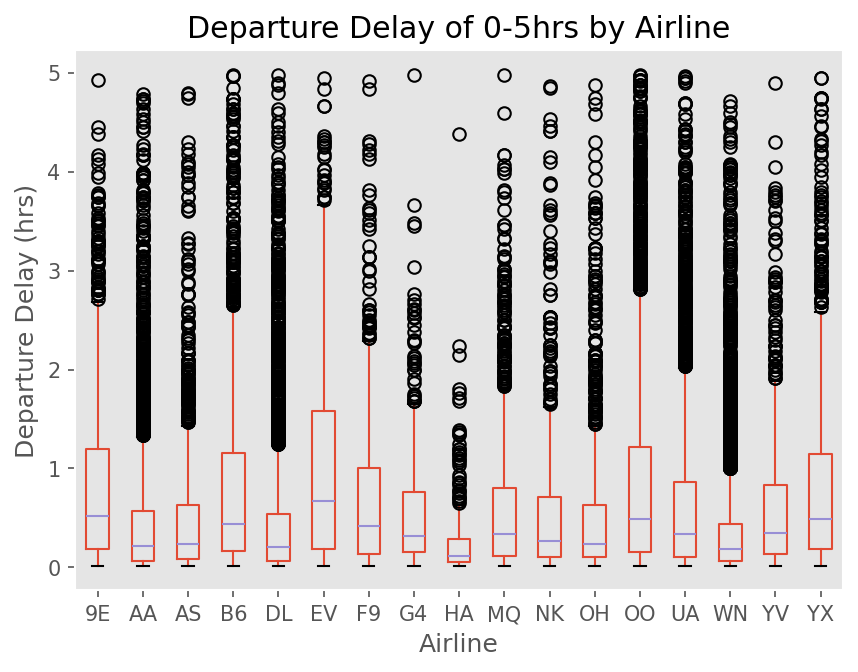

In [32]:
# boxplot of departure delay for each day of week

# select data needed
dep_info = jan[['DepDelay','Reporting_Airline']]
dep_info['DepDelay'] = dep_info['DepDelay']/60
dep_info = dep_info[dep_info['DepDelay']>0]
dep_info = dep_info[dep_info['DepDelay']<5]
dep_info.dropna(subset=['DepDelay'], inplace=True)


# Create the boxplot
plt.figure(figsize=(10, 6))  # Size of the plot
boxplot = dep_info.boxplot(by='Reporting_Airline', column='DepDelay', grid=False)
plt.title('Departure Delay of 0-5hrs by Airline')  
plt.suptitle('')  
plt.xlabel('Airline') 
plt.ylabel('Departure Delay (hrs)')  
plt.show()




In this visualization, I showed the minor departure delays (between 0 and 5 hours) by airline. I found that 'HA' has the lowest average delay time and 'EV' has the highest average delay time. 'HA' also has the smallest interquartile range, and 'EV' has the largest interquartile range. This indicates that 'HA' is the most stable airline, while 'EV' is the least stable airline in terms of departure delays.

## Data set 2

In [17]:
info = jan[['Reporting_Airline','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']]
info.describe()


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,19.042014,4.485196,18.823675,0.074268,25.013122
std,63.419368,39.872487,44.747241,2.127380,50.900442
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,6.000000,0.000000,0.000000
75%,16.000000,0.000000,21.000000,0.000000,29.000000
max,1389.000000,1398.000000,1322.000000,158.000000,1184.000000


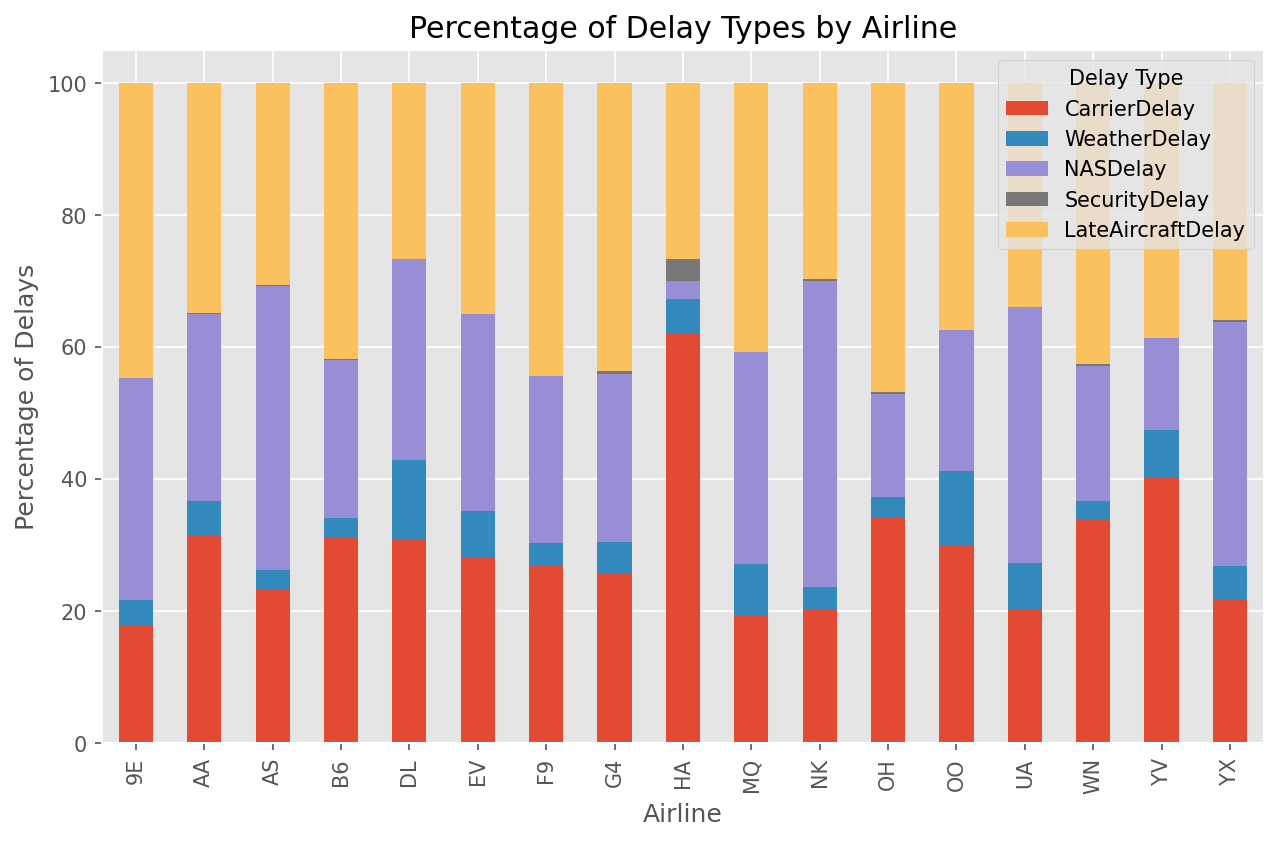

In [16]:
info = info.dropna()

# Group by airline and sum delays
grouped = info.groupby('Reporting_Airline').sum()

# Calculate percentage of each delay type
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Delay Types by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Delays')
plt.legend(title='Delay Type')
plt.show()


In this visualization, I created a stacked bar graph to show the percentage of delays by delay reason for each airline. Each airline has different breakdowns of delay reasons. I found that Carrier Delay and Late Aircraft Delay are the most common reasons of delays. Particularly, 'HA' has a very high percentage (over 60% of the time) of 'Carrier Delay'.